In [1]:
import pandas as pd

## Data Understanding

In [2]:
df_2014 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/country_partner_hsproduct4digit_year_2014.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_2014.head()

,location_id,partner_id,product_id,year,export_value,import_value,hs_eci,hs_coi,location_code,partner_code,hs_product_code
0,0,7,833,2014,123032,0,0.815531,-0.292281,ABW,ARE,2204
1,1,7,833,2014,0,81172,-0.907483,-0.827473,AFG,ARE,2204
2,2,7,833,2014,0,115361,-1.816664,-1.150108,AGO,ARE,2204
3,8,7,833,2014,2475957,0,0.101914,0.448220,ARG,ARE,2204
4,14,7,833,2014,12802326,173159,-0.401914,-0.171766,AUS,ARE,2204


In [4]:
# choose a specific product
# check hs_product.xlsx for looking up a product id
# we do NOT use hs_product_code
focus_product = 726 # Coffee (4 digit)

In [5]:
# create a dataframe for the specific product
df_2014_focus = df_2014[df_2014['product_id'] == focus_product]
df_2014_focus.head()

,location_id,partner_id,product_id,year,export_value,import_value,hs_eci,hs_coi,location_code,partner_code,hs_product_code
246906,1,7,726,2014,0,63168,-0.907483,-0.827473,AFG,ARE,901
246907,2,7,726,2014,0,11258,-1.816664,-1.150108,AGO,ARE,901
246908,4,7,726,2014,5943,0,-0.479972,-0.339917,ALB,ARE,901
246909,8,7,726,2014,60207,0,0.101914,0.448220,ARG,ARE,901
246910,14,7,726,2014,684611,17762,-0.401914,-0.171766,AUS,ARE,901


In [6]:
# number of export-import pairs
len(df_2014_focus)

7964

In [7]:
# choose a specific country
# check location.xlsx for looking up a country id
focus_country = 49 # Colombia
focus_sub_country = 231 # USA

In [8]:
# export from Colombia
df_2014_focus[df_2014_focus['location_id'] == focus_country]

,location_id,partner_id,product_id,year,export_value,import_value,hs_eci,hs_coi,location_code,partner_code,hs_product_code
246927,49,7,726,2014,363974,0,0.197101,-0.378588,COL,ARE,901
247027,49,8,726,2014,2049086,0,0.197101,-0.378588,COL,ARG,901
247070,49,15,726,2014,486646,0,0.197101,-0.378588,COL,AUT,901
247180,49,18,726,2014,70245248,3232,0.197101,-0.378588,COL,BEL,901
247315,49,32,726,2014,5783,7454665,0.197101,-0.378588,COL,BRA,901
...,...,...,...,...,...,...,...,...,...,...,...
253932,49,212,726,2014,986140,0,0.197101,-0.378588,COL,SYR,901
253990,49,223,726,2014,47669,0,0.197101,-0.378588,COL,TUN,901
254177,49,239,726,2014,293013,0,0.197101,-0.378588,COL,VNM,901
254478,49,0,726,2014,224675,489,0.197101,-0.378588,COL,ABW,901


In [9]:
# export from Colombia to USA
df_2014_focus[(df_2014_focus['location_id'] == focus_country) & (df_2014_focus['partner_id'] == focus_sub_country)]

,location_id,partner_id,product_id,year,export_value,import_value,hs_eci,hs_coi,location_code,partner_code,hs_product_code
251610,49,231,726,2014,1027901759,2408311,0.197101,-0.378588,COL,USA,901


In [10]:
# import to Colombia
df_2014_focus[df_2014_focus['partner_id'] == focus_country]

,location_id,partner_id,product_id,year,export_value,import_value,hs_eci,hs_coi,location_code,partner_code,hs_product_code
247803,0,49,726,2014,489,224675,0.815531,-0.292281,ABW,COL,901
247804,4,49,726,2014,0,42813,-0.479972,-0.339917,ALB,COL,901
247805,7,49,726,2014,0,363974,0.095593,-0.296020,ARE,COL,901
247806,8,49,726,2014,0,2049086,0.101914,0.448220,ARG,COL,901
247807,9,49,726,2014,0,46967,-0.201601,-0.592089,ARM,COL,901
...,...,...,...,...,...,...,...,...,...,...,...
247896,231,49,726,2014,2408311,1027901759,1.613885,0.069038,USA,COL,901
247897,239,49,726,2014,0,293013,-0.025695,1.345236,VNM,COL,901
247898,246,49,726,2014,0,2394100,0.280307,1.723713,ZAF,COL,901
247899,249,49,726,2014,0,5492803,1.949321,1.034218,TWN,COL,901


In [11]:
# import to Colombia from USA`
df_2014_focus[(df_2014_focus['location_id'] == focus_sub_country) & (df_2014_focus['partner_id'] == focus_country)]

,location_id,partner_id,product_id,year,export_value,import_value,hs_eci,hs_coi,location_code,partner_code,hs_product_code
247896,231,49,726,2014,2408311,1027901759,1.613885,0.069038,USA,COL,901


The file contains the identical records with the opposite direction (e.g., Colombia to USA, USA to Colombia). Thus, we should use location_id only when computing export and import values.

## Data Processing

### Compute the total export and import values of the focus product in 2014

In [12]:
df_2014_focus_export = df_2014_focus.groupby(['location_id']).agg({'export_value': 'sum'}).reset_index()
df_2014_focus_import = df_2014_focus.groupby(['location_id']).agg({'import_value': 'sum'}).reset_index()

In [13]:
df_2014_focus_export

,location_id,export_value
0,0,7914
1,1,0
2,2,720366
3,3,0
4,4,311470
...,...,...
220,246,20887764
221,247,817302
222,248,823471
223,249,4023429


In [14]:
df_2014_focus_import

,location_id,import_value
0,0,1801540
1,1,277196
2,2,4811221
3,3,1430
4,4,18435053
...,...,...
220,246,72025136
221,247,973209
222,248,997084
223,249,101642449


In [15]:
# sanity check
df_2014_focus_export['export_value'].sum() == df_2014_focus_import['import_value'].sum()

True

In [16]:
# number of countries
print(len(df_2014_focus_export), len(df_2014_focus_import))

225 225


### Add missing countries

In [17]:
df_location = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/location.xlsx')

In [18]:
df_location

,location_id,location_code,location_name_short_en,level,parent_id
0,0,ABW,Aruba,country,356.0
1,1,AFG,Afghanistan,country,353.0
2,2,AGO,Angola,country,352.0
3,3,AIA,Anguilla,country,356.0
4,4,ALB,Albania,country,355.0
...,...,...,...,...,...
253,253,3,Oceania,region,NaN
254,254,4,Europe,region,NaN
255,255,5,North America,region,NaN
256,256,6,South America,region,NaN


In [19]:
# remove region-level records
df_location_country = df_location[df_location['level'] == 'country']
print(len(df_location_country))

251


In [20]:
# merge tables
df_exp_imp = df_location_country[['location_id', 'location_code', 'location_name_short_en']]
df_exp_imp = pd.merge(df_exp_imp, df_2014_focus_export, left_on='location_id', right_on='location_id', how='left') # export value
df_exp_imp = pd.merge(df_exp_imp, df_2014_focus_import, left_on='location_id', right_on='location_id', how='left') # import value
df_exp_imp = df_exp_imp.rename(columns={'location_id': 'country_id', 'location_code': 'country_code', 'location_name_short_en': 'country_name_short_en'})

In [21]:
df_exp_imp

,country_id,country_code,country_name_short_en,export_value,import_value
0,0,ABW,Aruba,7914.0,1801540.0
1,1,AFG,Afghanistan,0.0,277196.0
2,2,AGO,Angola,720366.0,4811221.0
3,3,AIA,Anguilla,0.0,1430.0
4,4,ALB,Albania,311470.0,18435053.0
...,...,...,...,...,...
246,246,ZAF,South Africa,20887764.0,72025136.0
247,247,ZMB,Zambia,817302.0,973209.0
248,248,ZWE,Zimbabwe,823471.0,997084.0
249,249,TWN,Taiwan,4023429.0,101642449.0


### Trade flow in 2019

In [22]:
df_2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/country_partner_hsproduct4digit_year_2019.csv')

In [23]:
df_2019.head()

,location_id,partner_id,product_id,year,export_value,import_value,hs_eci,hs_coi,location_code,partner_code,hs_product_code
0,0,1,677,2019,2124,0,1.030314,-0.021657,ABW,AFG,405
1,7,1,677,2019,88420,0,-0.177291,-0.864360,ARE,AFG,405
2,61,1,677,2019,19988,0,2.071698,-2.368597,DEU,AFG,405
3,64,1,677,2019,158738,0,1.089803,1.248903,DNK,AFG,405
4,162,1,677,2019,123476,0,1.123986,1.389025,NLD,AFG,405


In [24]:
# create a dataframe for the specific product
df_2019_focus = df_2019[df_2019['product_id'] == focus_product]
df_2019_focus.head()

,location_id,partner_id,product_id,year,export_value,import_value,hs_eci,hs_coi,location_code,partner_code,hs_product_code
297414,7,1,726,2019,236288,0,-0.177291,-0.864360,ARE,AFG,901
297415,61,1,726,2019,55847,0,2.071698,-2.368597,DEU,AFG,901
297416,81,1,726,2019,9207,0,1.709755,0.737032,GBR,AFG,901
297417,103,1,726,2019,29425,0,-0.144464,1.519315,IDN,AFG,901
297418,104,1,726,2019,1138,0,0.433432,2.720152,IND,AFG,901


In [25]:
# number of export-import pairs
len(df_2019_focus)

8430

In [26]:
# all export-import country combinations
# cross join in SQL
dummy_1 = pd.DataFrame({'location_id': df_location_country['location_id'],
                        'location_code': df_location_country['location_code'],
                        'crossjoinkey': 1})
dummy_2 = pd.DataFrame({'partner_id': df_location_country['location_id'],
                        'partner_code': df_location_country['location_code'],
                        'crossjoinkey': 1})
df_trade = pd.merge(dummy_1, dummy_2, on='crossjoinkey', how='outer').drop(columns='crossjoinkey')

In [27]:
# remove self loop
df_trade = df_trade[df_trade['location_id'] != df_trade['partner_id']]

In [28]:
df_trade

,location_id,location_code,partner_id,partner_code
1,0,ABW,1,AFG
2,0,ABW,2,AGO
3,0,ABW,3,AIA
4,0,ABW,4,ALB
5,0,ABW,5,AND
...,...,...,...,...
62995,250,ANS,245,YUG
62996,250,ANS,246,ZAF
62997,250,ANS,247,ZMB
62998,250,ANS,248,ZWE


In [29]:
# merge the trade value (use export value)
df_trade = pd.merge(df_trade, df_2019_focus[['location_id', 'partner_id', 'export_value']], left_on=['location_id', 'partner_id'], right_on=['location_id', 'partner_id'], how='left')

In [30]:
# fill missing values
df_trade['trade_2019'] = df_trade['export_value'].fillna(0)
df_trade.drop(columns=['export_value'], inplace=True)

In [31]:
df_trade

,location_id,location_code,partner_id,partner_code,trade_2019
0,0,ABW,1,AFG,0.0
1,0,ABW,2,AGO,0.0
2,0,ABW,3,AIA,0.0
3,0,ABW,4,ALB,0.0
4,0,ABW,5,AND,0.0
...,...,...,...,...,...
62745,250,ANS,245,YUG,0.0
62746,250,ANS,246,ZAF,135596.0
62747,250,ANS,247,ZMB,0.0
62748,250,ANS,248,ZWE,0.0


In [32]:
# sanity_check
df_trade['trade_2019'].sum() == df_2019_focus['export_value'].sum()

True

In [33]:
# add binary variable
df_trade['trade_2019_binary'] = (df_trade['trade_2019'] > 0) * 1

In [34]:
df_trade

,location_id,location_code,partner_id,partner_code,trade_2019,trade_2019_binary
0,0,ABW,1,AFG,0.0,0
1,0,ABW,2,AGO,0.0,0
2,0,ABW,3,AIA,0.0,0
3,0,ABW,4,ALB,0.0,0
4,0,ABW,5,AND,0.0,0
...,...,...,...,...,...,...
62745,250,ANS,245,YUG,0.0,0
62746,250,ANS,246,ZAF,135596.0,1
62747,250,ANS,247,ZMB,0.0,0
62748,250,ANS,248,ZWE,0.0,0


### Distance

In [35]:
df_distance = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/country_distance.xls')

In [36]:
df_distance

,iso_o,iso_d,contig,comlang_off,comlang_ethno,colony,comcol,curcol,col45,smctry,dist,distcap,distw,distwces
0,ABW,ABW,0,0,0,0,0,0,0,0,5.225315,5.225315,25.0935,23.0472
1,ABW,AFG,0,0,0,0,0,0,0,0,13257.810000,13257.810000,13168.2,13166.4
2,ABW,AGO,0,0,0,0,0,0,0,0,9516.913000,9516.913000,9587.32,9584.19
3,ABW,AIA,0,0,1,0,0,0,0,0,983.268200,983.268200,976.897,976.892
4,ABW,ALB,0,0,0,0,0,0,0,0,9091.742000,9091.742000,9091.58,9091.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50171,ZWE,YUG,0,0,0,0,0,0,0,0,7056.402000,7056.402000,7046.43,7042.83
50172,ZWE,ZAF,1,1,1,0,0,0,0,0,2186.206000,926.174300,1258.55,1101.44
50173,ZWE,ZAR,0,0,0,0,0,0,0,0,2283.061000,2283.061000,1930.98,1719.15
50174,ZWE,ZMB,1,1,1,0,1,0,0,0,396.804100,396.804100,583.795,525.073


### Join tables

In [37]:
# trade 2019 table and distance table
# use inner join to drop records with no distance (e.g., 250 ANS)
df_model = pd.merge(df_trade, df_distance[['iso_o', 'iso_d', 'dist']], left_on=['location_code', 'partner_code'], right_on=['iso_o', 'iso_d'], how='inner').drop(columns=['iso_o', 'iso_d'])

In [38]:
df_model

,location_id,location_code,partner_id,partner_code,trade_2019,trade_2019_binary,dist
0,0,ABW,1,AFG,0.0,0,13257.8100
1,0,ABW,2,AGO,0.0,0,9516.9130
2,0,ABW,3,AIA,0.0,0,983.2682
3,0,ABW,4,ALB,0.0,0,9091.7420
4,0,ABW,5,AND,0.0,0,7572.7880
...,...,...,...,...,...,...,...
47737,249,TWN,243,YEM,0.0,0,8043.5200
47738,249,TWN,245,YUG,0.0,0,8888.8650
47739,249,TWN,246,ZAF,0.0,0,12686.7500
47740,249,TWN,247,ZMB,0.0,0,11059.7000


In [39]:
# join export and import 2014
df_model = pd.merge(df_model, df_exp_imp[['country_id', 'export_value']], left_on='location_id', right_on='country_id', how='left').drop(columns='country_id') # total export
df_model = pd.merge(df_model, df_exp_imp[['country_id', 'import_value']], left_on='partner_id', right_on='country_id', how='left').drop(columns='country_id') # total import
df_model = df_model.rename(columns={'export_value': 'export_value_2014', 'import_value': 'import_value_2014'}) # rename

In [40]:
# fill missing values
df_model['export_value_2014'] = df_model['export_value_2014'].fillna(0)
df_model['import_value_2014'] = df_model['import_value_2014'].fillna(0)

In [41]:
df_model

,location_id,location_code,partner_id,partner_code,trade_2019,trade_2019_binary,dist,export_value_2014,import_value_2014
0,0,ABW,1,AFG,0.0,0,13257.8100,7914.0,277196.0
1,0,ABW,2,AGO,0.0,0,9516.9130,7914.0,4811221.0
2,0,ABW,3,AIA,0.0,0,983.2682,7914.0,1430.0
3,0,ABW,4,ALB,0.0,0,9091.7420,7914.0,18435053.0
4,0,ABW,5,AND,0.0,0,7572.7880,7914.0,4581182.0
...,...,...,...,...,...,...,...,...,...
47737,249,TWN,243,YEM,0.0,0,8043.5200,4023429.0,2249901.0
47738,249,TWN,245,YUG,0.0,0,8888.8650,4023429.0,0.0
47739,249,TWN,246,ZAF,0.0,0,12686.7500,4023429.0,72025136.0
47740,249,TWN,247,ZMB,0.0,0,11059.7000,4023429.0,973209.0


In [42]:
# sanity check
df_model[(df_model['location_id'] == focus_country) & (df_model['partner_id'] == focus_sub_country)]

,location_id,location_code,partner_id,partner_code,trade_2019,trade_2019_binary,dist,export_value_2014,import_value_2014
9359,49,COL,231,USA,1.013938e+09,1,4021.171,2.194448e+09,5.445731e+09


In [43]:
# sanity check
df_model[(df_model['location_id'] == focus_sub_country) & (df_model['partner_id'] == focus_country)]

,location_id,location_code,partner_id,partner_code,trade_2019,trade_2019_binary,dist,export_value_2014,import_value_2014
44514,231,USA,49,COL,148208.0,1,4021.171,936590723.0,34745272.0


In [44]:
# sanity check
df_model[df_model['location_id'] == focus_country]

,location_id,location_code,partner_id,partner_code,trade_2019,trade_2019_binary,dist,export_value_2014,import_value_2014
9156,49,COL,0,ABW,294007.0,1,1036.634,2.194448e+09,1801540.0
9157,49,COL,1,AFG,0.0,0,14288.690,2.194448e+09,277196.0
9158,49,COL,2,AGO,0.0,0,9911.524,2.194448e+09,4811221.0
9159,49,COL,3,AIA,0.0,0,1997.527,2.194448e+09,1430.0
9160,49,COL,4,ALB,46088.0,1,10083.010,2.194448e+09,18435053.0
...,...,...,...,...,...,...,...,...,...
9369,49,COL,245,YUG,0.0,0,10090.990,2.194448e+09,0.0
9370,49,COL,246,ZAF,2312545.0,1,10630.440,2.194448e+09,72025136.0
9371,49,COL,247,ZMB,0.0,0,11582.730,2.194448e+09,973209.0
9372,49,COL,248,ZWE,0.0,0,11880.750,2.194448e+09,997084.0


In [45]:
# sanity check
df_model[df_model['partner_id'] == focus_country]

,location_id,location_code,partner_id,partner_code,trade_2019,trade_2019_binary,dist,export_value_2014,import_value_2014
41,0,ABW,49,COL,0.0,0,1036.634,7914.0,34745272.0
259,1,AFG,49,COL,0.0,0,14288.690,0.0,34745272.0
477,2,AGO,49,COL,0.0,0,9911.524,720366.0,34745272.0
695,3,AIA,49,COL,0.0,0,1997.527,0.0,34745272.0
913,4,ALB,49,COL,0.0,0,10083.010,311470.0,34745272.0
...,...,...,...,...,...,...,...,...,...
46694,245,YUG,49,COL,0.0,0,10090.990,0.0,34745272.0
46912,246,ZAF,49,COL,0.0,0,10630.440,20887764.0,34745272.0
47130,247,ZMB,49,COL,0.0,0,11582.730,817302.0,34745272.0
47348,248,ZWE,49,COL,0.0,0,11880.750,823471.0,34745272.0


## Model: Original

In [95]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [47]:
# replace 0 with a very small value for log calc
df_model['trade_2019'] = df_model['trade_2019'].replace(0, 10e-5)
df_model['export_value_2014'] = df_model['export_value_2014'].replace(0, 10e-5)
df_model['import_value_2014'] = df_model['import_value_2014'].replace(0, 10e-5)

In [48]:
# add log term
df_model['trade_2019_log'] = df_model['trade_2019'].apply(np.log)
df_model['export_value_2014_log'] = df_model['export_value_2014'].apply(np.log)
df_model['import_value_2014_log'] = df_model['import_value_2014'].apply(np.log)
df_model['dist_log'] = df_model['dist'].apply(np.log)

In [49]:
df_model

,location_id,location_code,partner_id,partner_code,trade_2019,trade_2019_binary,dist,export_value_2014,import_value_2014,trade_2019_log,export_value_2014_log,import_value_2014_log,dist_log
0,0,ABW,1,AFG,0.0001,0,13257.8100,7914.0,2.771960e+05,-9.21034,8.976389,12.532480,9.492342
1,0,ABW,2,AGO,0.0001,0,9516.9130,7914.0,4.811221e+06,-9.21034,8.976389,15.386461,9.160826
2,0,ABW,3,AIA,0.0001,0,983.2682,7914.0,1.430000e+03,-9.21034,8.976389,7.265430,6.890882
3,0,ABW,4,ALB,0.0001,0,9091.7420,7914.0,1.843505e+07,-9.21034,8.976389,16.729764,9.115122
4,0,ABW,5,AND,0.0001,0,7572.7880,7914.0,4.581182e+06,-9.21034,8.976389,15.337468,8.932317
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47737,249,TWN,243,YEM,0.0001,0,8043.5200,4023429.0,2.249901e+06,-9.21034,15.207645,14.626397,8.992622
47738,249,TWN,245,YUG,0.0001,0,8888.8650,4023429.0,1.000000e-04,-9.21034,15.207645,-9.210340,9.092555
47739,249,TWN,246,ZAF,0.0001,0,12686.7500,4023429.0,7.202514e+07,-9.21034,15.207645,18.092526,9.448313
47740,249,TWN,247,ZMB,0.0001,0,11059.7000,4023429.0,9.732090e+05,-9.21034,15.207645,13.788354,9.311063


In [50]:
pd.pivot_table(df_model, index='trade_2019_binary', aggfunc='count')

,dist,dist_log,export_value_2014,export_value_2014_log,import_value_2014,import_value_2014_log,location_code,location_id,partner_code,partner_id,trade_2019,trade_2019_log
trade_2019_binary,,,,,,,,,,,,
0,42804,42804,42804,42804,42804,42804,42804,42804,42804,42804,42804,42804
1,4938,4938,4938,4938,4938,4938,4938,4938,4938,4938,4938,4938


In [75]:
print('Negative data ratio {}'.format(len(df_model[df_model['trade_2019_binary'] == 0]) / len(df_model)))
print('Positive data ratio {}'.format(len(df_model[df_model['trade_2019_binary'] == 1]) / len(df_model)))

Negative data ratio 0.8965690586904612
Positive data ratio 0.10343094130953877


In [52]:
# regression
Y = df_model['trade_2019_log']
X = df_model[['export_value_2014_log', 'import_value_2014_log', 'dist_log']]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         trade_2019_log   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     3081.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:27:11   Log-Likelihood:            -1.5251e+05
No. Observations:               47742   AIC:                         3.050e+05
Df Residuals:                   47738   BIC:                         3.051e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.8365      0.326      2.565      0.010       0.197       1.476
export_value_2014_log     0.1677      0.003     66.151      0.000       0.163       0.173
import_value_2014_log     0.2158      0.004     48.943      0.000       0.207       0.224
dist_log                 -1.4050      0.035    -39.890      0.000      -1.474      -1.336
==============================================================================
Omnibus:                    17857.401   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54070.261
Skew:                           2.011   Prob(JB):                         0.00
Kurtosis:                       6.318   Cond. No.                         245.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# classification
Y = df_model['trade_2019_binary']
X = df_model[['export_value_2014_log', 'import_value_2014_log', 'dist_log']]
model = LogisticRegression(random_state=0).fit(X, Y)
pred = model.predict(X)
model.score(X, Y)

0.933098739055758

In [54]:
# accuracy
sum(pred == Y)/len(Y)

0.933098739055758

In [58]:
# confusion matrix
cm = confusion_matrix(Y, pred)
print(cm)

[[41940   864]
 [ 2330  2608]]


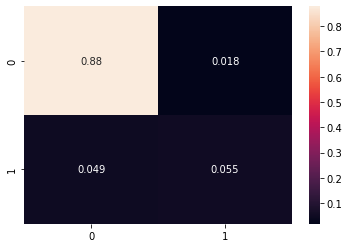

In [61]:
# confusion matrix (ratio)
cm_ratio = cm / cm.sum()
sns.heatmap(cm_ratio, annot=True)

In [65]:
# f1 score
f1_score(Y, pred)

0.6202140309155767

## Model: Down-sampling

In [80]:
# positive data 
df_model_pos = df_model[df_model['trade_2019_binary'] == 1]

In [81]:
# negative data
df_model_neg = df_model[df_model['trade_2019_binary'] == 0]

In [83]:
# number of negative data to be sampled
num_neg = len(df_model_pos) * 2
print(num_neg)

9876


In [88]:
# sampled negative data
df_model_neg_sample = df_model_neg.sample(n=num_neg, random_state=0)

In [91]:
# concatenate all positive data and sampled negative data
df_model_ds = pd.concat([df_model_pos, df_model_neg_sample], ignore_index=True)
df_model_ds

,location_id,location_code,partner_id,partner_code,trade_2019,trade_2019_binary,dist,export_value_2014,import_value_2014,trade_2019_log,export_value_2014_log,import_value_2014_log,dist_log
0,2,AGO,18,BEL,12160.0000,1,6696.2290,720366.0000,1.208318e+09,9.405907,13.487515,20.912495,8.809300
1,2,AGO,61,DEU,10486.0000,1,6738.3520,720366.0000,3.594008e+09,9.257796,13.487515,22.002534,8.815571
2,2,AGO,71,ESP,132441.0000,1,5752.2520,720366.0000,1.007620e+09,11.793893,13.487515,20.730857,8.657347
3,2,AGO,177,POL,15801.0000,1,6838.7120,720366.0000,6.286246e+08,9.667829,13.487515,20.259045,8.830355
4,2,AGO,179,PRT,829754.0000,1,5779.5030,720366.0000,2.678578e+08,13.628885,13.487515,19.405967,8.662073
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14809,158,NFK,206,SVK,0.0001,0,16755.7600,0.0001,3.304271e+08,-9.210340,-9.210340,19.615897,9.726497
14810,89,GNQ,80,GAB,0.0001,0,380.9314,0.0001,7.537020e+05,-9.210340,-9.210340,13.532752,5.942619
14811,149,MSR,219,TKM,0.0001,0,11351.4900,0.0001,3.283650e+05,-9.210340,-9.210340,12.701881,9.337104
14812,190,SDN,71,ESP,0.0001,0,4459.1550,37426.0000,1.007620e+09,-9.210340,10.530121,20.730857,8.402715


In [107]:
# classification
Y = df_model_ds['trade_2019_binary']
X = df_model_ds[['export_value_2014_log', 'import_value_2014_log', 'dist_log']]

In [108]:
# split to training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(10369, 3) (4445, 3) (10369,) (4445,)


In [109]:
# train a model
model = LogisticRegression(random_state=0).fit(X_train, Y_train)
Y_pred_is = model.predict(X_train)
Y_pred_os = model.predict(X_test)
print('In sample accuracy: {}'.format(model.score(X_train, Y_train)))
print('Out of sample accuracy: {}'.format(model.score(X_test, Y_test)))

In sample accuracy: 0.8680682804513453
Out of sample accuracy: 0.8713160854893138


In [110]:
# confusion matrix
cm = confusion_matrix(Y_test, Y_pred_os)
print(cm)

[[2713  303]
 [ 269 1160]]


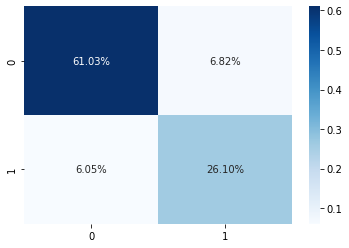

In [115]:
# confusion matrix (ratio)
cm_ratio = cm / cm.sum()
sns.heatmap(cm_ratio, annot=True, fmt='.2%', cmap='Blues')

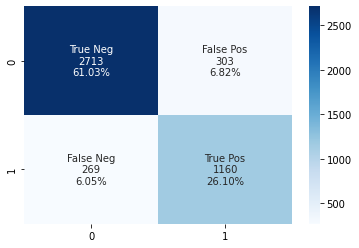

In [119]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [112]:
# f1 score
f1_score(Y_test, Y_pred_os)

0.8022130013831259